In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [4]:
dir(tf.keras.datasets.cifar10)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


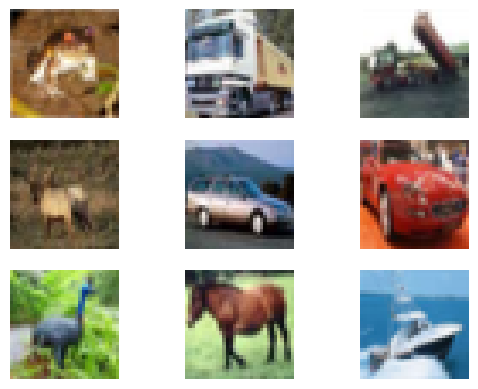

In [7]:
rows = 3
cols = 3
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

Before, we used MLP so that meant each pixel was a feature so we needed to reshape

Here, we do not need to reshape, only normalize.

In [8]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [9]:
print("Original: ", y_train[0])

Original:  [6]


In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print("After encoding: ",y_train[0])

After encoding:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int=10
    IMG_HEIGHT: int=32
    IMG_WIDTH: int=32
    NUM_CHANNELS: int=3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int=30
    BATCH_SIZE: int=256
    LEARNING_RATE: int=0.001

In [13]:
def cnn_model(input_shape=(32,32,3)):
    model=Sequential()
    #Conv block 1
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Conv block 2
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Conv block 3
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Flatten the conv output
    # Flattens converts the conv output to a 1D output for the fully connected layers
    model.add(Flatten())
    # Fully connected dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [14]:
model = cnn_model()
model.summary()

C:\Users\rinit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='categorical_crossentropy'
)

In [20]:
history = model.fit(X_train,
                   y_train,
                   batch_size=TrainingConfig.BATCH_SIZE,
                   epochs=TrainingConfig.EPOCHS,
                   verbose=1,
                   validation_split=0.3)

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.4362 - loss: 1.5291 - val_accuracy: 0.5301 - val_loss: 1.3171
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 314ms/step - accuracy: 0.5454 - loss: 1.2645 - val_accuracy: 0.6086 - val_loss: 1.1063
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 44s 319ms/step - accuracy: 0.6195 - loss: 1.0744 - val_accuracy: 0.6559 - val_loss: 0.9812
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 289ms/step - accuracy: 0.6673 - loss: 0.9418 - val_accuracy: 0.6931 - val_loss: 0.8861
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - accuracy: 0.7059 - loss: 0.8271 - val_accuracy: 0.7106 - val_loss: 0.8391
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - accuracy: 0.7387 - loss: 0.7436 - val_accuracy: 0.7233 - val_loss: 0.8006
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - accuracy: 0.7684 - loss: 0.6649 - val_accuracy: 0.7272 - val_loss: 0.7970
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 288ms/step - accuracy: 0.7860 - loss: 0

In [21]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

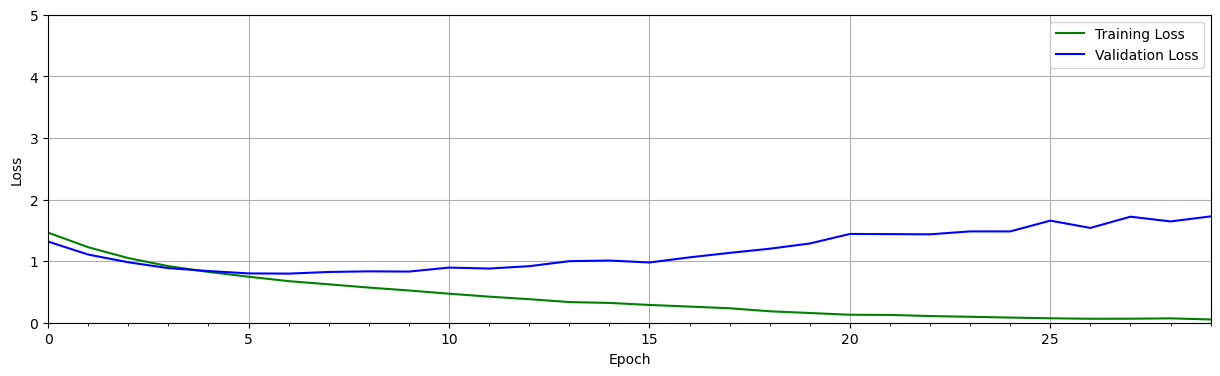

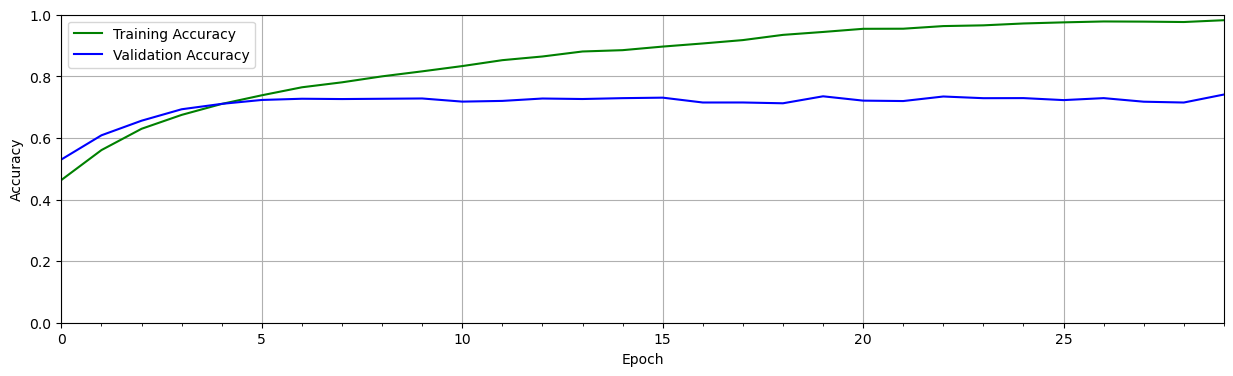

In [22]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

We can see that the training loss is very less after the 25th epoch but the validation loss is only increasing.

This implies that our CNN model is overfitting. Hence we will use a regularization technique called Dropout.

In [23]:
def cnn_model_dropout(input_shape=(32, 32, 3)):
    
    model = Sequential()
    
    # Conv Block 1
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Flatten 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [24]:
model_dropout = cnn_model_dropout()
model_dropout.summary()

C:\Users\rinit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_dropout.compile(optimizer='adam',
                     metrics=['accuracy'],
                     loss='categorical_crossentropy')

In [27]:
history = model_dropout.fit(
    X_train, y_train, batch_size=TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_split = 0.3
)

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 502ms/step - accuracy: 0.2106 - loss: 2.0914 - val_accuracy: 0.4066 - val_loss: 1.5951
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 61s 445ms/step - accuracy: 0.4102 - loss: 1.5845 - val_accuracy: 0.4943 - val_loss: 1.3811
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 64s 463ms/step - accuracy: 0.4957 - loss: 1.3803 - val_accuracy: 0.5823 - val_loss: 1.1680
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 463ms/step - accuracy: 0.5637 - loss: 1.2087 - val_accuracy: 0.6340 - val_loss: 1.0386
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 459ms/step - accuracy: 0.6051 - loss: 1.1010 - val_accuracy: 0.6521 - val_loss: 0.9818
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 462ms/step - accuracy: 0.6308 - loss: 1.0323 - val_accuracy: 0.6620 - val_loss: 0.9546
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 64s 464ms/step - accuracy: 0.6586 - loss: 0.9540 - val_accuracy: 0.6903 - val_loss: 0.8871
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 64s 464ms/step - accuracy: 0.6798 - loss: 0

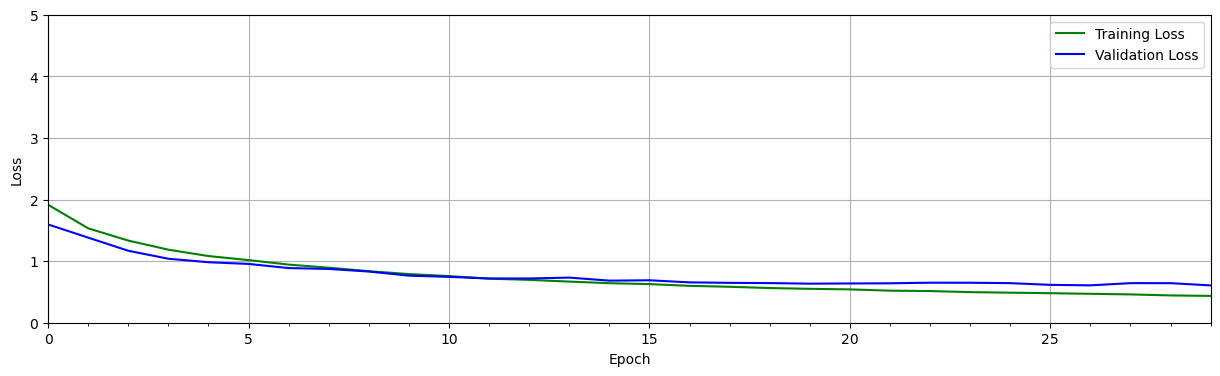

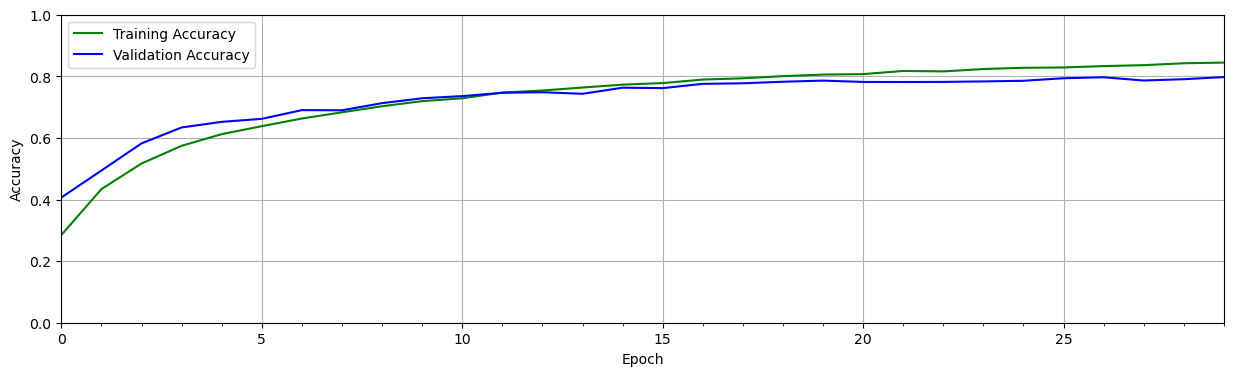

In [28]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

In [30]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7945 - loss: 0.6170
Test accuracy: 79.520


In [31]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 3
    num_cols = 3

    data_batch = dataset[0 : num_rows * num_cols]

    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

In [32]:
predictions = model_dropout.predict(X_test)
predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


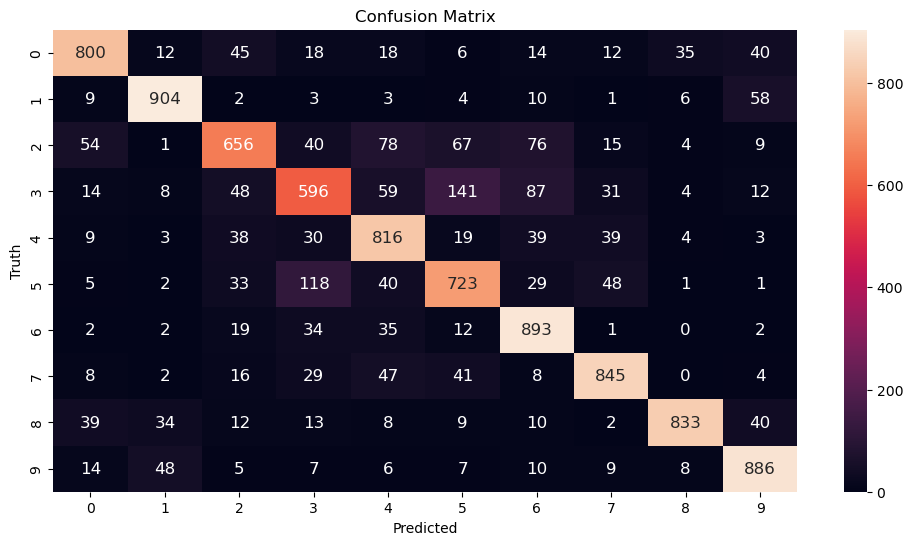

In [34]:
y_test_integer_labels = tf.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

plt.figure(figsize=[12, 6])

sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()